In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(train_ds, val_ds), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.F3Z8P4_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
IMG_SIZE = (150, 150)

def format_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label


In [4]:
train_ds = train_ds.map(format_image).shuffle(1000).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(format_image).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.5770 - loss: 0.6914 - val_accuracy: 0.7395 - val_loss: 0.5292
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.7466 - loss: 0.5170 - val_accuracy: 0.7840 - val_loss: 0.4584
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.8006 - loss: 0.4324 - val_accuracy: 0.7994 - val_loss: 0.4309
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8346 - loss: 0.3681 - val_accuracy: 0.8055 - val_loss: 0.4635
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.8768 - loss: 0.2858 - val_accuracy: 0.8031 - val_loss: 0.5124
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9287 - loss: 0.1776 - val_accuracy: 0.8020 - val_loss: 0.6775
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - accuracy: 0.9592 - loss: 0.1033 - val_accuracy: 0.7954 - val_loss: 0.8374
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.9770 - loss: 0.0615 - 

In [8]:
model.save('cats_vs_dogs_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


<ipython-input-9-42dbc31d2912>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = int(predictions[i] > 0.5)


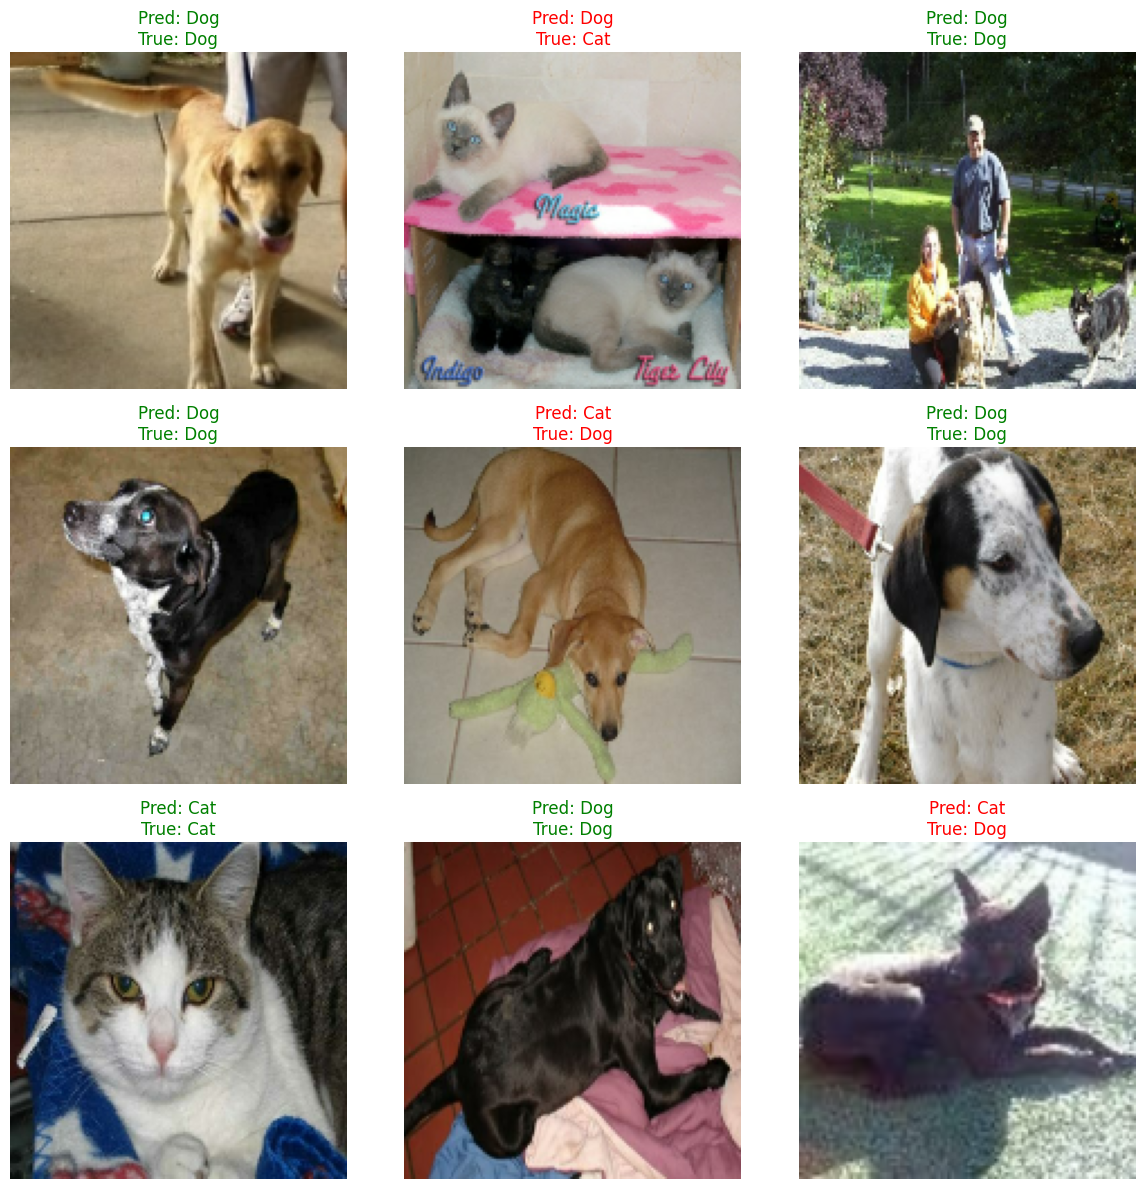

In [9]:
# Plot predictions on a few validation images
class_names = ['Cat', 'Dog']  # 0 = cat, 1 = dog

# Take one batch of images and labels from the validation set
for images, labels in val_ds.take(1):
    predictions = model.predict(images)

    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(12, 12))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())

        # Convert prediction to class label (0 or 1)
        pred_label = int(predictions[i] > 0.5)
        true_label = int(labels[i])

        color = "green" if pred_label == true_label else "red"
        plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}", color=color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


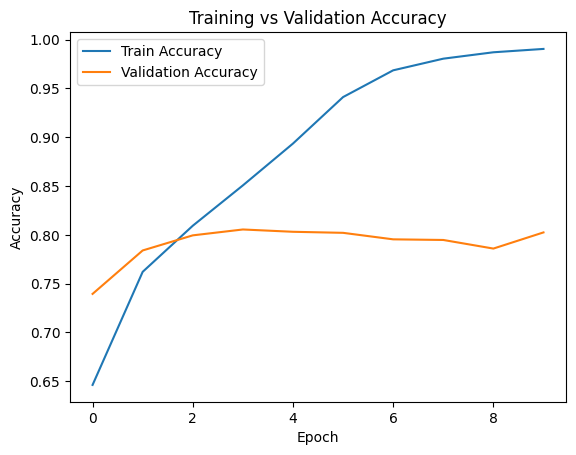

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
